<center><h1> Customer Churn Prediction Model </h1>
<h4>By: Ravikumar Patel </h4></center>


A customer churn means when a customer stopped using the company's services or products during a specific period and customer churn rate is the percentage of those customers [Source](https://blog.hubspot.com/service/what-is-customer-churn). This period could be days, months, quarters or years. So, suppose the company decides to use a month as a period. In that case, they can deduct the value of customers after a month from the customers the company had at the beginning of the month and calculate its percentage. **Note:** It is important not to include new customers in this calculation; otherwise, the fetched insights will not be accurate.

The company would like to make this churn percentage as close to 0% as possible. If the customer churn percentage is higher, that means the company is not getting revenue from the customers and without the profit, they can not operate as successfully as possible.

According to The American Customer Satisfaction Index, which measures the overall customer satisfaction by sector according to a formula, only 72.2% of customers are satisfied with their current telecom provider [Source](https://www.theacsi.org/acsi-benchmarks/benchmarks-by-sector). It means 27.8% of customers are highly risked of leaving the company. However, it doesn't mean satisfied customers will not leave. They might leave, but it is not very likely that they will leave. In 2017, Canada's two telecommunication company Telus and BCE (Bell), reported that it cost them 50 times more to get new customers than it would have cost to retain existing customers [Source](https://telecoms.com/opinion/churn-is-breaking-the-telecoms-market-heres-how-to-fix-it/).

The dataset used in the project is taken from [Kaggle](https://www.kaggle.com/abhinav89/telecom-customer). The dataset contains over 100 features and 100,000 instances. It does not contain any information about the observation time frame; however, the instances of churn between 31-60 days after the observation date. The features contain almost all the features regarding telecom customers in categorical and continuous values. To help reduce the customer churn percentage, the companies use predictive models to offer special perks to those who are more likely to leave.

Following are the steps to develop a customer churn prediction model

1.	Data Analysis
2.	Data Preprocessing
3.	Feature Selection
4.	Model Selection and Training
5.	Model Evaluation

In [1]:
# basic library import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# to split the data into random smaller sets
from sklearn.model_selection import train_test_split

with open("Telecom_customer churn.csv", 'r') as file:
    df = pd.read_csv(file)

display(df.head())

X_train, X_test = train_test_split(df, test_size = 0.2, random_state=10)

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,I,U,U,U,U,U,Y,434.0,1000005


## Data Analysis

In [2]:
# the code on this cell has been from tutorial 2 CSCI 4146 course
def buildContinuousFeaturesReport(features, data_df):
	conHead = ['Count', 'Miss %', 'Card.', 'Min', '1st Qrt.',
            'Mean', 'Median', '3rd Qrt.', 'Max', 'Std. Dev.']

	conOut_df = pd.DataFrame(index=features, columns=conHead)
	columns_df = data_df[features]

	#COUNT
	conOut_df[conHead[0]] = len(columns_df)

	#MISS % 
	conOut_df[conHead[1]] = columns_df.isna().sum() / len(columns_df) * 100

	#CARDINALITY
	conOut_df[conHead[2]] = columns_df.nunique()

	#MINIMUM
	conOut_df[conHead[3]] = columns_df.min()

	#1ST QUARTILE
	conOut_df[conHead[4]] = columns_df.quantile(0.25)

	#MEAN
	conOut_df[conHead[5]] = columns_df.mean()

	#MEDIAN
	conOut_df[conHead[6]] = columns_df.median()

	#3rd QUARTILE
	conOut_df[conHead[7]] = columns_df.quantile(0.75)

	#MAX
	conOut_df[conHead[8]] = columns_df.max()

	#STANDARD DEVIATION
	conOut_df[conHead[9]] = columns_df.std()

	return conOut_df

def buildCategoricalFeaturesReport(features, data_df):
	catHead = ['Count', 'Miss %', 'Card.', 'Mode', 'Mode Freq',
            'Mode %', '2nd Mode', '2nd Mode Freq', '2nd Mode %']

	columns_df = data_df[features]

	#preparing a dictionary for storing data
	stats_dict = {k: ['']*len(features) for k in catHead}

	#CARDINALITY
	stats_dict['Card.'] = columns_df.nunique()

	missing = columns_df.isna().sum() / len(columns_df) * 100

	for col in columns_df:
		values = columns_df[col].value_counts()
		index = features.index(col)

    #COUNT
		stats_dict['Count'][index] = len(columns_df)
		
		#MISS %
		stats_dict['Miss %'][index] = missing[col]

		#MODES
		mode = values.index[0]
		mode2 = values.index[1] if len(values.index) > 1 else mode
		stats_dict['Mode'][index] = mode
		stats_dict['2nd Mode'][index] = mode2

		#MODE FREQ
		modeCount = values.loc[mode]
		modeCount2 = values.loc[mode2]
		stats_dict['Mode Freq'][index] = modeCount
		stats_dict['2nd Mode Freq'][index] = modeCount2

		#MODE %
		miss = stats_dict['Miss %'][index]

		modePer = (modeCount/(len(columns_df)*((100-miss)/100)))*100
		stats_dict['Mode %'][index] = round(modePer, 2)

		modePer2 = (modeCount2/(len(columns_df)*((100-miss)/100)))*100
		stats_dict['2nd Mode %'][index] = round(modePer2, 2)
	
	output_df = pd.DataFrame.from_dict(stats_dict)
	return output_df

In [3]:
# build the data quality reports(DQRs) for continuous and categorical features 
dqr_continuous_listings = buildContinuousFeaturesReport(X_train.select_dtypes('number').columns.to_list(), X_train)
dqr_categorical_listings = buildCategoricalFeaturesReport(X_train.select_dtypes('object').columns.to_list(), X_train)

#display the reports
with pd.option_context('display.max_rows', None, 'display.max_columns', None),\
    pd.option_context('display.float_format', '{:.2f}'.format):
        print("Data quality report for quantitative features")
        display(dqr_continuous_listings)

        print("\nData quality report for qualitative features")
        display(dqr_categorical_listings)

Data quality report for quantitative features


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
rev_Mean,80000,0.36,33218,-6.17,33.28,58.61,48.32,70.71,1223.38,44.54
mou_Mean,80000,0.36,9140,0.00,150.50,512.50,355.00,702.25,7242.00,520.69
totmrc_Mean,80000,0.36,7263,-26.91,30.00,46.21,44.99,59.99,399.99,23.58
da_Mean,80000,0.36,161,0.00,0.00,0.88,0.25,0.74,72.77,2.11
ovrmou_Mean,80000,0.36,2421,0.00,0.00,40.74,2.75,42.00,4320.75,96.04
ovrrev_Mean,80000,0.36,10721,0.00,0.00,13.47,0.97,14.38,1102.40,30.31
vceovr_Mean,80000,0.36,6700,0.00,0.00,13.20,0.61,14.00,890.76,29.84
datovr_Mean,80000,0.36,686,0.00,0.00,0.26,0.00,0.00,423.54,3.18
roam_Mean,80000,0.36,4689,0.00,0.00,1.25,0.00,0.23,1112.45,9.10
change_mou,80000,0.89,7156,-3406.50,-87.25,-14.44,-6.25,63.25,5192.25,258.46



Data quality report for qualitative features


,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
new_cell,80000,0.00,3,U,53426,66.78,Y,15531,19.41
crclscod,80000,0.00,54,AA,29285,36.61,A,13626,17.03
asl_flag,80000,0.00,2,N,68893,86.12,Y,11107,13.88
prizm_social_one,80000,7.39,5,S,25603,34.56,U,18865,25.46
area,80000,0.04,19,NEW YORK CITY AREA,8897,11.13,LOS ANGELES AREA,5285,6.61
dualband,80000,0.00,4,Y,57902,72.38,N,18452,23.06
refurb_new,80000,0.00,2,N,68452,85.56,R,11548,14.44
hnd_webcap,80000,10.19,3,WCMB,60669,84.44,WC,11000,15.31
ownrent,80000,33.72,2,O,51415,96.96,R,1611,3.04
dwlltype,80000,31.92,2,S,39044,71.69,M,15417,28.31


From the Data Quality Reports, some features contain numeric values but are qualitative by nature. Like, truck, rv, lor and others. So, let's move those features to the correct category and rerun the report.

In [4]:
# move truck, rv, lor, adults, income, numbcars to categorical analysis
lst_cat = ['truck', 'rv', 'lor', 'adults', 'income', 'numbcars']

dqr_continuous_listings = dqr_continuous_listings.drop(lst_cat)

lst_cat.extend(X_train.select_dtypes('object').columns.to_list())
dqr_categorical_listings = buildCategoricalFeaturesReport(lst_cat, X_train)

#display the reports
with pd.option_context('display.max_rows', None, 'display.max_columns', None),\
    pd.option_context('display.float_format', '{:.2f}'.format):
        print("Data quality report for quantitative features")
        display(dqr_continuous_listings)

        print("\nData quality report for qualitative features")
        display(dqr_categorical_listings)

Data quality report for quantitative features


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt.,Max,Std. Dev.
rev_Mean,80000,0.36,33218,-6.17,33.28,58.61,48.32,70.71,1223.38,44.54
mou_Mean,80000,0.36,9140,0.00,150.50,512.50,355.00,702.25,7242.00,520.69
totmrc_Mean,80000,0.36,7263,-26.91,30.00,46.21,44.99,59.99,399.99,23.58
da_Mean,80000,0.36,161,0.00,0.00,0.88,0.25,0.74,72.77,2.11
ovrmou_Mean,80000,0.36,2421,0.00,0.00,40.74,2.75,42.00,4320.75,96.04
ovrrev_Mean,80000,0.36,10721,0.00,0.00,13.47,0.97,14.38,1102.40,30.31
vceovr_Mean,80000,0.36,6700,0.00,0.00,13.20,0.61,14.00,890.76,29.84
datovr_Mean,80000,0.36,686,0.00,0.00,0.26,0.00,0.00,423.54,3.18
roam_Mean,80000,0.36,4689,0.00,0.00,1.25,0.00,0.23,1112.45,9.10
change_mou,80000,0.89,7156,-3406.50,-87.25,-14.44,-6.25,63.25,5192.25,258.46



Data quality report for qualitative features


,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
truck,80000,1.72,2,0.00,63784,81.13,1.00,14839,18.87
rv,80000,1.72,2,0.00,72163,91.78,1.00,6460,8.22
lor,80000,30.19,16,1.00,8001,14.33,2.00,7216,12.92
adults,80000,23.00,6,2.00,18423,29.91,1.00,17851,28.98
income,80000,25.41,9,6.00,15039,25.20,7.00,9313,15.61
numbcars,80000,49.31,3,1.00,20492,50.54,2.00,17068,42.09
new_cell,80000,0.00,3,U,53426,66.78,Y,15531,19.41
crclscod,80000,0.00,54,AA,29285,36.61,A,13626,17.03
asl_flag,80000,0.00,2,N,68893,86.12,Y,11107,13.88
prizm_social_one,80000,7.39,5,S,25603,34.56,U,18865,25.46


### Quantitative feature analysis

The DQR of quantitative features shows that most of the features for means or total (ends with '_Means' or starts with 'avg' or 'adj' or 'tot') have a higher number of outliers, i.e. difference between 3rd Qrtile and max value is too big. The box plot and histogram can help gain some more information about these features and make sound decisions for handling them. The missing values in features are not that high, so handling them is not a big task that requires a lot of analysis.

Some features contain high values, but from the problem domain knowledge, these values are not feasible. The errors might cause because of a collection error or the wrong value. It needs to analyze further along with the feature ("eqpdays"). The "eqpdays" represents how since when (number of days) the customer has the current equipment, i.e. how long ago the customer got the equipment they are using. This feature contains negative values, which does not make sense unless it means that the new equipment is on the way (in the shipping) to the customer. Since the information is not provided, analysis is required before making any decisions.

#### Features with high number of outliers

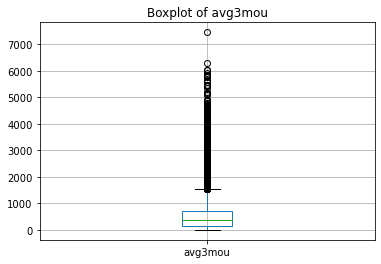

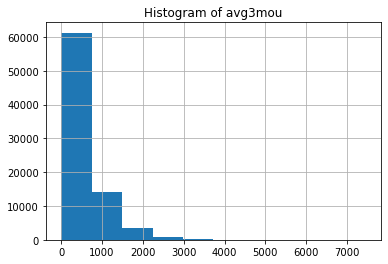

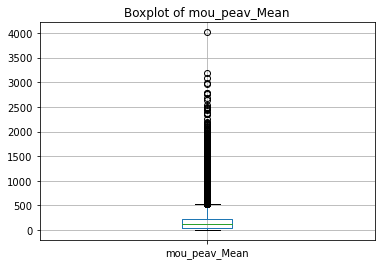

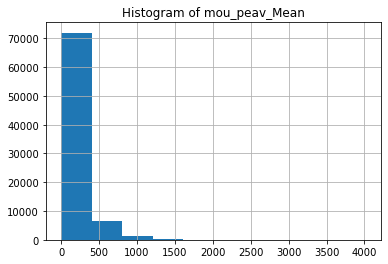

In [5]:
def plot(df, features):
    """
        plot the boxplot and histogram for the given features from given dataframe

        Args:
            df (DataFrame): DataFrame object that contains data to preprocess
            features (list of string): plot boxplot and histograms of the 
                features in the list
    """
    for i in features:    
        df.boxplot(column=i)
        plt.title('Boxplot of '+ i)
        df.hist(column=i)
        plt.title('Histogram of '+ i)
        plt.show()

# find features with high outliers
lst_not_high_outliers = ['churn', 'months', 'uniqsubs', 'actvsubs', 'phones', \
                         'models', 'forgntvl', 'Customer_ID']

lst_high_outliers = list(set(dqr_continuous_listings.index) - set(lst_not_high_outliers))

plot(X_train, lst_high_outliers[:2]) # only show top 2 to keep file short

The above graphs show some exciting things: on average, the company makes close to zero revenue per month from most customers. It even loses money on some customers than making revenue. It can also be seen in the average revenue change per month, comparing to the past quarter compony is getting $1.12 less per customer. More than 75% of customers do not use their data to complete calls and rely on the company's signals most of the time. This data to complete calls could be that WIFI-calling feature that new smartphones have built-in. More than 50% of customers do not use three-way calling; however, average customers are using around 174 calling minutes every month. This 174 calling minutes is a deficient number, and this shows that customers are only using 3 hours for the calling. It could mean two things: the telecom company does not have unlimited calling, which is highly unlikely, or the customers are not attached to the phone and do not use it there as often. The last thing to notice is that, on average, customers stay with the company for around 19 months; this includes long-time customers, prepaid, postpaid and customers who have an agreement with the company. As stated earlier, a company can spend less money retaining current customers than getting new ones.

#### Features with wrong high value analysis

Check values in uniqsubs


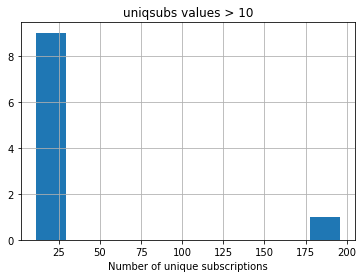

In [6]:
# uniqsubs analysis
print("Check values in uniqsubs")
plt.title("uniqsubs values > 10")
plt.xlabel("Number of unique subscriptions")
X_train[X_train['uniqsubs'] > 10]['uniqsubs'].hist()
plt.show()

Above the graph shows the number of customers who have more than ten unique subscribers in the household. The maximum number 196 is an error unless it is business, but the dataset does not contain any business accounts. So, the background problem understanding was correct in this case.

Check values in actvsubs


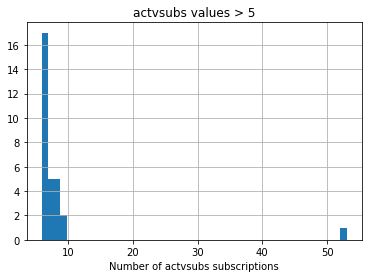

In [7]:
# actvsubs analysis
print("Check values in actvsubs")
plt.title("actvsubs values > 5")
plt.xlabel("Number of actvsubs subscriptions")
X_train[X_train['actvsubs'] > 5]['actvsubs'].hist(bins=50)
plt.show()

Again, it is clear from the graph that the extreme value in actvsubs is just an input error and does not have any real meaning behind it.

Check values in phones


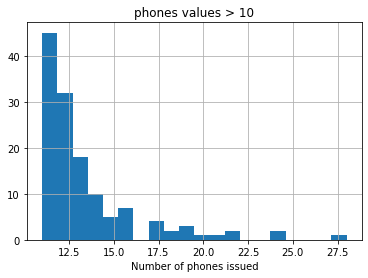

In [8]:
# phones analysis
print("Check values in phones")
plt.title("phones values > 10")
plt.xlabel("Number of phones issued")
X_train[X_train['phones'] > 10]['phones'].hist(bins=20)
plt.show()

The graph shows that there are customers with multiple handsets/phones, and it goes as high as 28. From the problem understanding, this is very unlikely to happen, unless customers are with the company for a long time and had issues with almost every phone he or she received. Also, up to 15 phones can be argued to have multiple lines and go on two years agreement often.

Check values in models


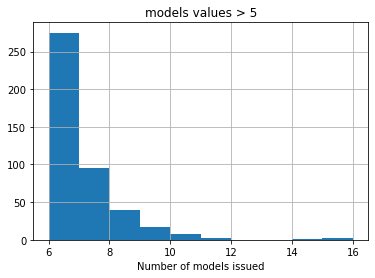

In [9]:
# models analysis
print("Check values in models")
plt.title("models values > 5")
plt.xlabel("Number of models issued")
X_train[X_train['models'] > 5]['models'].hist()
plt.show()

The graph for models provides evidence that customers are getting a higher number of phones (complementing the phone graph) because of technical issues with their existing ones. Again, the extreme value here is plausible, but the number of customers is significantly less, so less informative.

#### Features with wrong negative values analysis

Check values in eqpdays


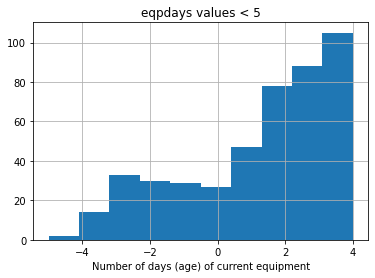

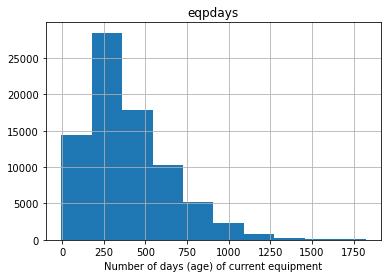

In [10]:
# eqpdays analysis
print("Check values in eqpdays")
plt.title("eqpdays values < 5")
plt.xlabel("Number of days (age) of current equipment")
X_train[X_train['eqpdays'] < 5]['eqpdays'].hist()
plt.show()

plt.title("eqpdays")
plt.xlabel("Number of days (age) of current equipment")
X_train['eqpdays'].hist()
plt.show()

Even from the graph, it is not easy to decide whether or not eqpdays's negative value is the correct value or not. Since the number of customers with negative eqpdays is more than 250, it may be possible that our assumption that the customer booked a phone but has not arrived yet is correct. But, without more information, it is safer not to make any decision about it.

### Qualitative feature analysis

The DQR of qualitative features shows that almost every qualitative feature has some missing values and goes as high as 49.31%. These features need to analysis, so this analysis can help with preprocessing them. Also, there is a feature, dual-band, which has four unique values. Intuitively, it should only have a binary value, so it is a little interesting. Also, in the different sections, the analysis of features with a small and large number of unique values is explained. Overall, for features with a small number of unique values, one value dominates heavily (more than 70%).

#### Features with more than 10% missing values



Feature : lor


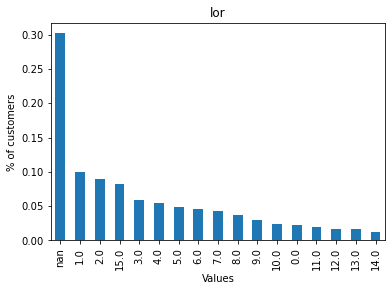

Feature : adults


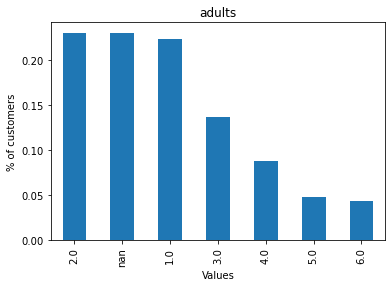

Feature : income


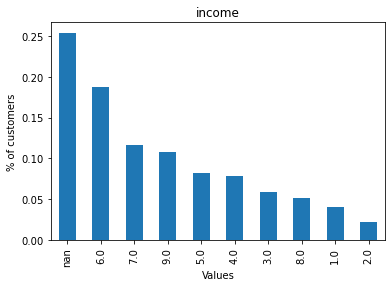

Feature : numbcars


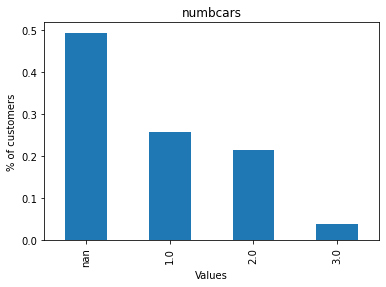

Feature : hnd_webcap


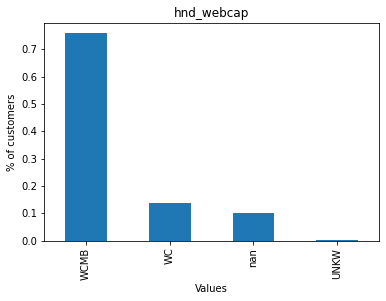

Feature : ownrent


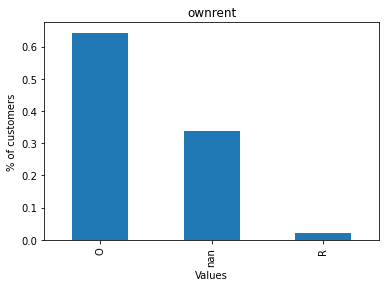

Feature : dwlltype


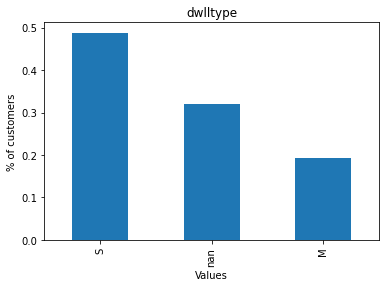

Feature : infobase


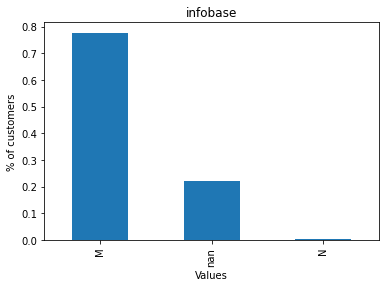

Feature : HHstatin


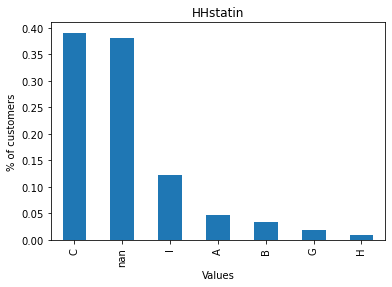

Feature : dwllsize


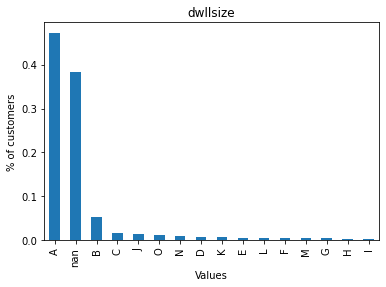

In [11]:
# analyze categorical features with more than 10% missing values
high_missing =  dqr_categorical_listings[(dqr_categorical_listings['Miss %'] > 10)].index.to_list()
for f in high_missing:
    print("Feature :", f)
    plt.title(f)
    plt.xlabel("Values")
    plt.ylabel("% of customers")
    X_train[f].value_counts(normalize=True, dropna = False).plot(kind='bar')
    plt.show()

The lor ("Length of residence") feature has around 30% instances with null values, and around 10% of customers reside at the same place for a year. It may tell us that these customers just bought a new house. The idea is complemented by the ownrent feature, which shows that around 2% of customers live in the rental. However, keep in mind that the ownrent feature has high null values of 34%.

Around 50% of customers have one or two adults in their household and not to mention that there are 25% missing values. The customers' estimated income feature shows that most customers are earning average or higher than average money. It could prove to be an informative feature since many customers churn because of the price issue and less because of service issues. Still, since missing values are 25.41%, it is better not to make any assumptions or imputer information.

The number of cars in the household has around 50% missing values, which may be possible because they do not have any cars as there are no customers with zero cars. The dwlltype feature tells that around 20% of customers live in movable houses, like RVs and trucks. Similar information can be seen in the rv and truck feature.

#### Features with smaller number of values analysis

Feature : asl_flag


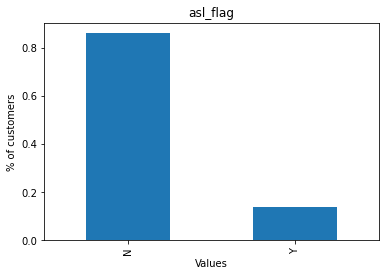

Feature : refurb_new


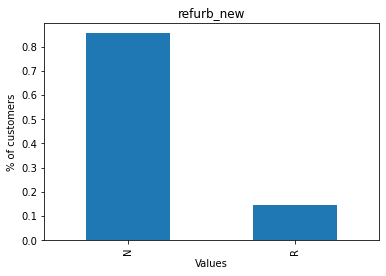

Feature : ownrent


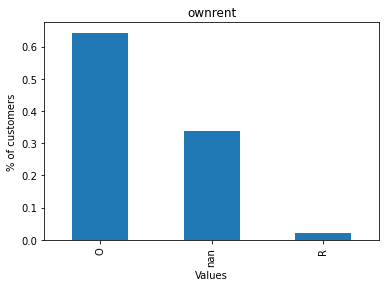

Feature : dwlltype


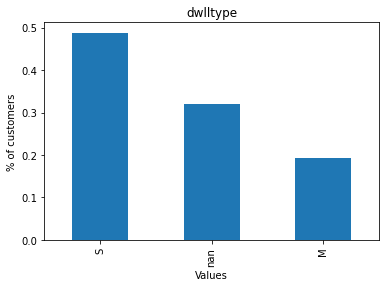

Feature : infobase


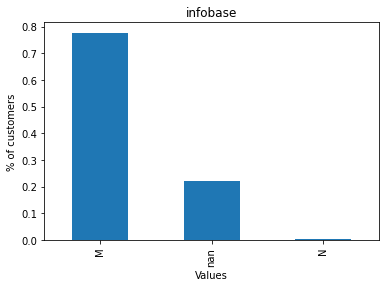

Feature : kid0_2


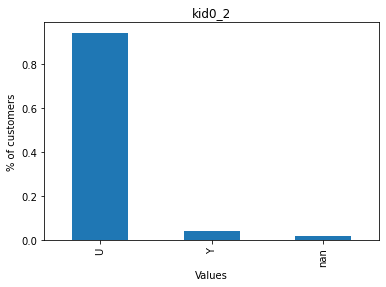

Feature : kid3_5


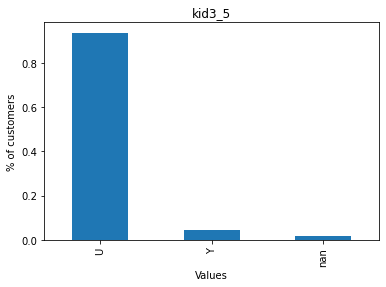

Feature : kid6_10


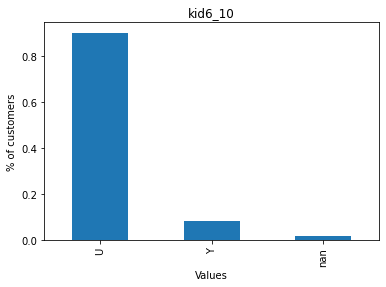

Feature : kid11_15


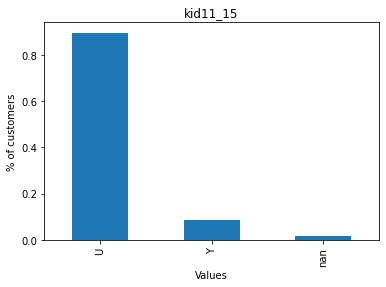

Feature : kid16_17


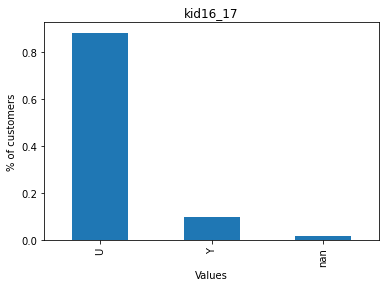

Feature : creditcd


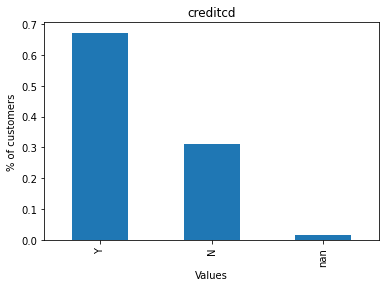

Feature : new_cell


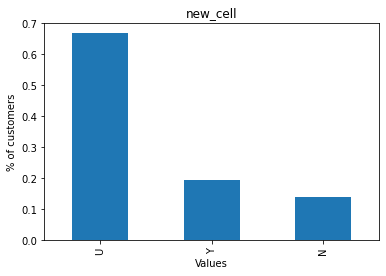

Feature : prizm_social_one


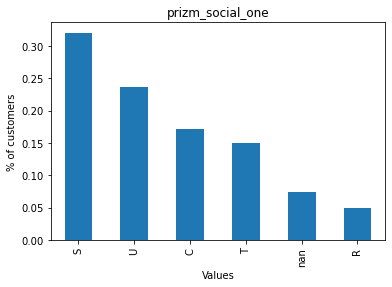

Feature : hnd_webcap


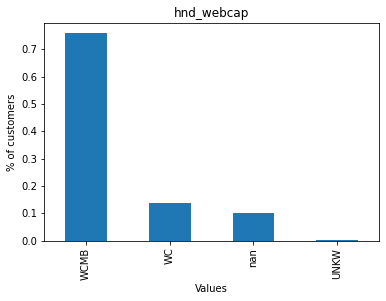

Feature : marital


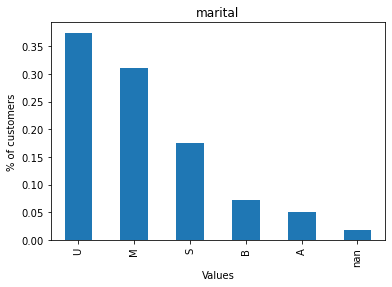

Feature : HHstatin


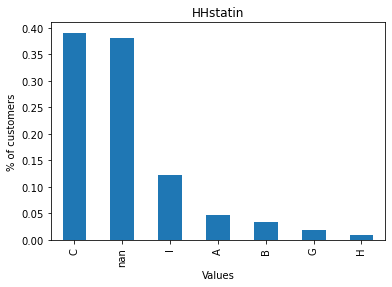

In [12]:
# analyze categorical features with small number of values
lst_features = ['asl_flag', 'refurb_new', 'ownrent', 'dwlltype', 'infobase', \
              'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', \
              'creditcd', 'new_cell', 'prizm_social_one', 'hnd_webcap', \
              'marital', 'HHstatin']

for f in lst_features:
    print("Feature :", f)
    plt.title(f)
    plt.xlabel("Values")
    plt.ylabel("% of customers")
    X_train[f].value_counts(normalize=True, dropna = False).plot(kind='bar')
    plt.show()

The above graphs show that the dataset contains unknown values for more than 80% of customers. The asl_flag feature represents whether or not the account received a spending limit, and one assumption is the feature is derived from the credit score. In that case, it may provide some helpful information in classification but yet to figure out. Also, around 15% of customers use refurbished phones, which does not mean that the remaining 85% of customers are using new ones. They may be using old used phones, and they did not purchase the phone from the company. The new_cell feature provides evidence of this assumption, where only around 19% of customers use new phones; also, 66% of data is tagged with U, i.e. Unknown, in the new_cell feature. Similarly, more than 35% of customers' marital status is unknown.

#### Features with uncommon values analysis

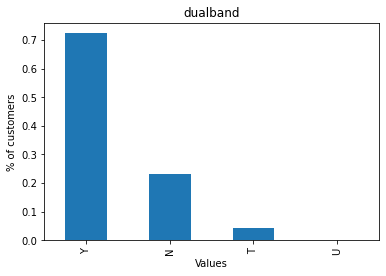

In [13]:
# dualband analysis
plt.title('dualband')
plt.xlabel("Values")
plt.ylabel("% of customers")
X_train['dualband'].value_counts(normalize=True, dropna = False).plot(kind='bar')
plt.show()

The Y and N in the dualband feature values make sense, but the dataset also contains T and U, where U can mean unknown. But the T is not matching the business understanding knowledge. All the new phones are dualbands, so considering T and U as Y is not the wrong thing.

#### Features with large values analysis

Feature : crclscod


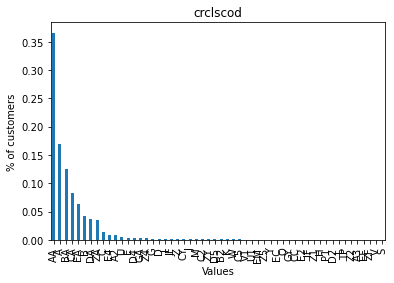

Feature : area


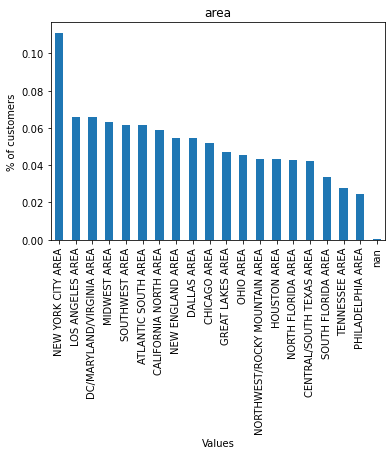

Feature : dwllsize


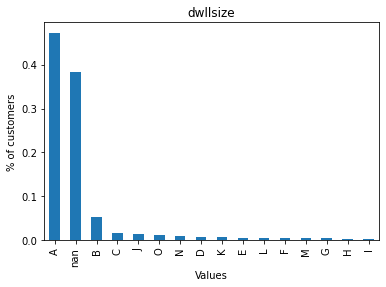

Feature : ethnic


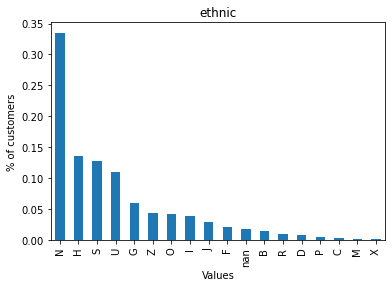

In [14]:
# analyze features with large number of values
lst_features = ['crclscod', 'area', 'dwllsize', 'ethnic']

for f in lst_features:
    print("Feature :", f)
    plt.title(f)
    plt.xlabel("Values")
    plt.ylabel("% of customers")
    X_train[f].value_counts(normalize=True, dropna = False).plot(kind='bar')
    plt.show()

Except for the area feature, every other feature with many values has one dominant feature with more than 30% occurrences. The crclscod feature represents the credit class code for the customers. It could provide meaningful information; however, it contained 54 unique values, not numeric.

## Data Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

class preprocessing:

    def __init__(self):
        """
            populates the list with the appropriate features and creates two imputers 
            for replacing null values with mode and mean
        """
        self.lst_drop = ['Customer_ID', 'ethnic', 'lor', 'income', 'HHstatin', \
                         'infobase', 'dwlltype', 'dwllsize', 'marital', 'kid0_2', \
                         'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'forgntvl']

        self.lst_high_outliers = lst_high_outliers

        self.lst_clip_10 = ['actvsubs', 'models']
        self.lst_clip_27 = ['uniqsubs']
        self.lst_clip_20 = ['phones', ]

        self.lst_imputing_mode = ['rv', 'truck', 'hnd_webcap', 'adults', \
                                      'creditcd', 'prizm_social_one', 'dualband', \
                                      'area', 'phones', 'models', 'refurb_new']

        self.lst_one_hot = ['prizm_social_one', 'crclscod', 'area', 'hnd_webcap', \
                            'dualband', 'new_cell']

        self.imputer_mode = SimpleImputer(strategy='most_frequent')
        self.imputer_mean = SimpleImputer(strategy='mean')

    def preprocess(self, df):
        """
            preprocess the given dataframe with specific techniques and 
            returns the dataframe object
            
            Args:
                df (DataFrame): DataFrame object that contains data to preprocess
            
            Returns:
                DataFrame: Preprocessed dataframe
        """
        
        df = df.drop(self.lst_drop, axis=1)

        # replace with mean
        df[self.lst_high_outliers] = self.imputer_mean.fit_transform(df[self.lst_high_outliers])
        
        # make feature zero mean with one standard deviation
        self.ss = StandardScaler().fit(df[self.lst_high_outliers])
        df[self.lst_high_outliers] = self.ss.transform(df[self.lst_high_outliers])

        # replace with mode
        df[self.lst_imputing_mode] = self.imputer_mode.fit_transform(df[self.lst_imputing_mode])
        
        df[self.lst_clip_10] = df[self.lst_clip_10].clip(1, 10)
        df[self.lst_clip_20] = df[self.lst_clip_20].clip(1, 20)
        df[self.lst_clip_27] = df[self.lst_clip_27].clip(1, 27)

        df['numbcars'] = df['numbcars'].fillna(0)
        df['numbcars'] = df['numbcars'].clip(upper = 1)

        df['ownrent'] = df['ownrent'].fillna('O')
        df['ownrent'] = df['ownrent'].replace(['O', 'R'],[1, 0])

        df['asl_flag'] = df['asl_flag'].replace(['Y', 'N'],[1, 0])

        df['refurb_new'] = df['refurb_new'].replace(['N', 'R'],[1, 0])

        df['creditcd'] = df['creditcd'].replace(['Y', 'N'],[1, 0])

        df['dualband'] = df['dualband'].replace(['T', 'U', 'Y', 'N'],[1, 1, 1, 0])

        # select only crclscod that is present in the dataset for more than 1%
        freq_crclscod = df['crclscod'].value_counts(normalize=True)
        self.lst_selected_crclscod = freq_crclscod[freq_crclscod > \
                                                 0.01].index.tolist()
        df.loc[~df['crclscod'].isin(self.lst_selected_crclscod), \
             'crclscod'] = 'Other'

        # encode and concate qualitative features using one-hot encoding
        df = pd.concat([df, pd.get_dummies(df[self.lst_one_hot])], axis = 1)
        df = df.drop(self.lst_one_hot, axis=1)

        return df

The preprocessing started by dropping some features, like "Customer_ID," which provides no information on churn prediction, "Ethnic" to avoid teaching racism to the model. Other features have either a higher number of missing or unknown ('U') values. Then, the quantitative features with a lower number of null values are imputed by the mean of the features and scaled using a standard scaler, which scales features to zero mean and one standard deviation. Similarly, the qualitative features were imputed by the mode of the feature. The features with wrong high values were clipped down to their respected high and low values. The qualitative features with binary non-numeric values are replaced by binary numeric values. Since 'crclscod' feature contains a high number of values and some values are only present in less than 1%. To reduce the "curse of dimensionality", selected features that contained at least 1% values. The rest are encoded as 'Other.' Finally, any qualitative features with more than two values are encoded using one-hot encoding.

## Feature Selection

In [16]:
import warnings

# ignore warnings
warnings.filterwarnings('ignore')

In [17]:
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from IPython.display import clear_output

In [18]:
y_train = X_train['churn']
y_test = X_test['churn']

X_train = X_train.drop(['churn'], axis=1)
X_test = X_test.drop(['churn'], axis=1)

preprocessor = preprocessing()

X_train = preprocessor.preprocess(X_train)
X_test = preprocessor.preprocess(X_test)

X_training, X_validation, y_training, y_validation = train_test_split(X_train, y_train, random_state=42, test_size=0.15)

First, the target feature, 'churn', is separated from the rest of the dataset in both training and test datasets. Then, preprocessing is done on both training and test datasets, and the training dataset is split again into training and validation datasets. The validation dataset will evaluate the performance of selected models to choose one model for the final evaluation.

In [19]:
# calculates the ANOVA scores using training dataset
anova_scores, _ = f_classif(X_training, y_training)

dic_anova_score = {}

features = X_training.columns.to_list()

for i, score in enumerate(anova_scores):
    dic_anova_score[features[i]] = score

# sort the relationships descending
dic_anova_score = sorted(dic_anova_score.items(), key = lambda x : x[1], reverse = True)

display(dic_anova_score[:2]) # print top 2 features with highest ANOVA score

lst_sel_features = [k for k, v in dic_anova_score]

[('eqpdays', 868.7114071540028), ('hnd_price', 728.5555600159838)]

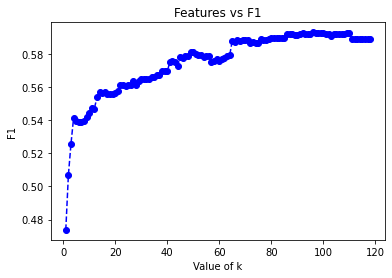

Best F1 is  0.592965568308034 at 96


In [20]:
def plot_loss_vs_k(df, target_feature, features, model, title):
    """
    plot the graph using 0 to all features against the F1 score using given 
    model and finds the best top k features that provide the best F1 score

    Args:
        df (DataFrame): Contains training dataset
        target_feature(series): Contains the target feature
        features(list of strings): Ordered list of features in highest to lowest informative
        model(Object):  An object of sklearn ML object that will be used to evaluate F1 Score
        title(string): A title for the graph that will be plotted
      
    Returns:
        int: number of top k features selected using highest F1 score
      
    """
    data = []

    X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(df, target_feature, test_size=0.2, random_state=10 )

    best_f1 = -1
    best_k = 1

    for k in range(1, len(features)+1):
        model.fit(X_train_k[features[:k]], y_train_k)
        y_pred = model.predict(X_test_k[ features[:k] ] )

        f1 = f1_score(y_test_k, y_pred)
        data.append(f1)
        (best_f1, best_k) = (f1, k) if best_f1 < f1 else (best_f1, best_k)
        print("Current features : {0} and F1: {1} \t best features : {2}".format(k, f1, best_k))

    clear_output()
    plt.title(title)
    plt.xlabel('Value of k')
    plt.ylabel('F1')
    plt.plot(range(1, len(features)+1), data, 'b--o')
    plt.show()

    print("Best F1 is ", best_f1, "at", best_k)

    return best_k

lr = LogisticRegression(solver='newton-cg', penalty='none', random_state=42)
k = plot_loss_vs_k(X_training, y_training, lst_sel_features, lr, "Features vs F1")

In [21]:
X_train = X_train.drop(lst_sel_features[k:], axis=1)
X_test = X_test.drop(lst_sel_features[k:], axis=1)
X_training = X_training.drop(lst_sel_features[k:], axis=1)
X_validation = X_validation.drop(lst_sel_features[k:], axis=1)

Since the features set is quite large, the wrapper feature selection method would be computation-intensive, so to sort the features according to their importance, a filter method was used. The target feature is qualitative, which means three methods can be used, chi-squared, mutual information and F value from ANOVA (f_classif). The chi-squared method requires non-negative values, and the training dataset contains negative numbers as Standard scaller was used without MinMax scaller, so this method can not be used. The mutual information and f_clssif provided almost similar ordered features, and f_classif ran much faster than mutual information, so f_classif was used as a feature selection method.

To select the optimal number of features, the whole training dataset and ordered list of features were sent to a function along with a model, in this case, LogisticRegression, without any penalty. The function iteratively fits the model with top k features and calculates the F1 score using a holdout dataset. Only top k features were selected based on the highest F1 score.

## Model Selection and Training

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

The three models were selected, Random Forest, Ada Boost and eXtreme Gradient Boosting classifier. The problem at hand is complicated, and ensemble models have proven very effective in complex problems, so their use can provide us better results.

The Random Forest Classifier (RFC) uses multiple Decision Trees (DT), trains them on various sub-section of data and uses voting weighted by probability estimated. The Ada Boost Classifier (ABC) uses a series of baseline estimators to classify the instances. First, one baseline estimator is trained on the dataset, and then subsequent models are trained using the same instances where miss-classified instances have higher weights. So, subsequent models focus on features that previous models misclassified. Finally, similar to the Ada Boost classifier, the eXtreme Gradient Boosting (XGBoost) Classifier uses subsequent models to improve the performance. However, the new models are created to reduce the residual/error of the previous model, and it does use a gradient descent algorithm. The XGBoost has proven very time-efficient and compute-efficient.

The selection of the model requires testing against the unseen dataset. The training dataset has already been split twice for testing and validation of the model. The further split can cause the model not being able to use the entire dataset. Also, if another subset is taken from the training dataset and used to check the performance and tweak the model parameters, it may be possible to overfit that subset. A cross-validation technique can help to resolve the problem. The training dataset is divided into different equal subsets (in our case, 5). The model is trained on the k-1 subset, and a remaining subset is used to check the performance, which is repeated over all subsets. By using cross-validation, our model is not checked against only one set, but at the end, the whole dataset.

In [23]:
def run_RFC(**params):
    """
    Run Random Forest Classifier with given parameters with 5-fold cross 
    validation

    Args:
        params(dictionary): Contains required parameters to use for the training 
            of the RFC model on the training dataset. The number of parameters is 
            not defined so that it can handle an arbitrary number of parameters.
      
    """
  
    RFC = RandomForestClassifier(**params, random_state = 42, n_jobs = -1)

    mean_f1 = np.mean(cross_val_score(RFC, X_training, y_training, \
                                    scoring = "f1", cv=5))

    print("Random Forest Classifier, F1 Score: {:.5f}".format(mean_f1))
    for k, v in params.items():
    print("{0} = {1}".format(k, v))

In [24]:
run_RFC()

Random Forest Classifier, F1 Score: 0.61271


In [25]:
run_RFC(criterion = "entropy")

Random Forest Classifier, F1 Score: 0.61415
criterion = entropy


In [26]:
run_RFC(max_depth = 3, criterion = "entropy")

Random Forest Classifier, F1 Score: 0.61613
max_depth = 3
criterion = entropy


In [27]:
run_RFC(max_depth = 5, criterion = "entropy")

Random Forest Classifier, F1 Score: 0.62212
max_depth = 5
criterion = entropy


In [28]:
run_RFC(max_depth = 8, criterion = "entropy")

Random Forest Classifier, F1 Score: 0.63083
max_depth = 8
criterion = entropy


In [29]:
run_RFC(max_features = "log2", max_depth = 8, criterion = "entropy")

Random Forest Classifier, F1 Score: 0.62298
max_features = log2
max_depth = 8
criterion = entropy


In [30]:
run_RFC(max_features = "sqrt", max_depth = 8, criterion = "entropy")

Random Forest Classifier, F1 Score: 0.63083
max_features = sqrt
max_depth = 8
criterion = entropy


Initially, RFC with default parameters was evaluated and used as a baseline model for other RFCs. After the initial run, the criterion parameter was changed to "entropy" instead of "gini", which gave a better result. Then the maximum depth of DTs in the RFC was changed to improve the result, reduce the variance (ensuring less over-fitting) and use as early stopping criteria. The maximum depth of 8 proved the better option. Finally, DT's maximum features parameter experiments were performed, and the "sqrt" value gave a similar high value without this parameter. So, to keep the most robust model, A RFC with maximum features as "sqrt", maximum depth as 8 and criterion as "entropy" will be used for further evaluation.

#### Ada Boost Classifier

In [31]:
def run_ABC(**params):  
    """
    Run Ada Boost Classifier with given parameters with 5-fold cross 
    validation

    Args:
        params(dictionary): Contains required parameters to use for the training 
            of the ABC model on the training dataset. The number of parameters is 
            not defined so that it can handle an arbitrary number of parameters.
      
    """
    ABC = AdaBoostClassifier(**params, random_state = 42)

    mean_f1 = np.mean(cross_val_score(ABC, X_training, y_training, \
                                    scoring = "f1", cv=5))

    print("Ada Boost Classifier, F1 Score: {:.5f}".format(mean_f1))
    for k, v in params.items():
        print("{0} = {1}".format(k, v))

In [32]:
BE = DecisionTreeClassifier(random_state = 42, min_impurity_decrease = 0.001)
run_ABC(base_estimator = BE)

Ada Boost Classifier, F1 Score: 0.61556
base_estimator = DecisionTreeClassifier(min_impurity_decrease=0.001, random_state=42)


In [33]:
BE = DecisionTreeClassifier(random_state = 42, min_impurity_decrease = 0.01)
run_ABC(base_estimator = BE)

Ada Boost Classifier, F1 Score: 0.61622
base_estimator = DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=42)


In [34]:
BE = DecisionTreeClassifier(random_state = 42, min_impurity_decrease = 0.01 )
run_ABC(n_estimators = 100, base_estimator = BE)

Ada Boost Classifier, F1 Score: 0.61622
n_estimators = 100
base_estimator = DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=42)


In [35]:
BE = DecisionTreeClassifier(random_state = 42, min_impurity_decrease = 0.01)
run_ABC(algorithm = "SAMME", base_estimator = BE)

Ada Boost Classifier, F1 Score: 0.61622
algorithm = SAMME
base_estimator = DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=42)


In [36]:
BE = DecisionTreeClassifier(max_depth = 3, random_state = 42)
run_ABC(base_estimator = BE)

Ada Boost Classifier, F1 Score: 0.61689
base_estimator = DecisionTreeClassifier(max_depth=3, random_state=42)


In [37]:
BE = DecisionTreeClassifier(max_depth = 5, random_state = 42)
run_ABC(algorithm = 'SAMME', base_estimator = BE)

Ada Boost Classifier, F1 Score: 0.62223
algorithm = SAMME
base_estimator = DecisionTreeClassifier(max_depth=5, random_state=42)


In [38]:
BE = DecisionTreeClassifier(max_depth = 5, random_state = 42)
run_ABC(base_estimator = BE, n_estimators = 100, algorithm = 'SAMME')

Ada Boost Classifier, F1 Score: 0.62221
base_estimator = DecisionTreeClassifier(max_depth=5, random_state=42)
n_estimators = 100
algorithm = SAMME


Similar to RFC, ABC was trained using default parameters and then changed one parameter at a time. Also, kept the parameter values that provided better performance. Also, the parameters like min_impurity_decrease and max_depth of DT's were tuned using the same technique. Finally, after all the experiments, ABC with the base estimator as DT with a maximum depth of 5 and the "SAMME" algorithm gave the highest performance.

#### eXtreme Gradient Boosting Classifier

In [39]:
def run_XGBC(**params):
    """
    Run eXtreme Gradient Boosting Classifier with given parameters with 5-fold 
    cross validation

    Args:
        params(dictionary): Contains required parameters to use for the training 
            of the XGBoost model on the training dataset. The number of parameters 
            is not defined, so that it can handle an arbitrary number of parameters.
      
    """

    XGBC = xgb.XGBClassifier(**params, random_state = 42, n_jobs=-1)

    mean_f1 = np.mean(cross_val_score(XGBC, X_training, y_training, \
                                    scoring = "f1", cv=5))
    clear_output()
    print("eXtreme Gradient Boosting Classifier, F1 Score: {:.5f}".format(mean_f1))
    for k, v in params.items():
        print("{0} = {1}".format(k, v))

In [40]:
run_XGBC()

eXtreme Gradient Boosting Classifier, F1 Score: 0.62389


In [41]:
run_XGBC(max_depth=5)

eXtreme Gradient Boosting Classifier, F1 Score: 0.62765
max_depth = 5


In [42]:
run_XGBC(max_depth=8)

eXtreme Gradient Boosting Classifier, F1 Score: 0.61329
max_depth = 8


In [43]:
run_XGBC(learning_rate= 0.01 ,max_depth=5)

eXtreme Gradient Boosting Classifier, F1 Score: 0.63984
learning_rate = 0.01
max_depth = 5


In [44]:
run_XGBC(learning_rate= 0.01 ,max_depth=5, n_estimators = 125)

eXtreme Gradient Boosting Classifier, F1 Score: 0.64056
learning_rate = 0.01
max_depth = 5
n_estimators = 125


In [45]:
run_XGBC(reg_lambda=0.75,learning_rate= 0.01 ,max_depth=5, n_estimators = 125)

eXtreme Gradient Boosting Classifier, F1 Score: 0.64064
reg_lambda = 0.75
learning_rate = 0.01
max_depth = 5
n_estimators = 125


In [46]:
run_XGBC(reg_lambda=0.125,learning_rate= 0.01 ,max_depth=5, n_estimators = 125)

eXtreme Gradient Boosting Classifier, F1 Score: 0.64016
reg_lambda = 0.125
learning_rate = 0.01
max_depth = 5
n_estimators = 125


In [47]:
run_XGBC(gamma=1, reg_lambda=0.125,learning_rate= 0.01 ,max_depth=5, \
         n_estimators = 125)

eXtreme Gradient Boosting Classifier, F1 Score: 0.64022
gamma = 1
reg_lambda = 0.125
learning_rate = 0.01
max_depth = 5
n_estimators = 125


In [48]:
run_XGBC(reg_alpha = 1, gamma = 0.5, reg_lambda = 0.125, learning_rate = 0.01, \
         max_depth=5, n_estimators = 125)

eXtreme Gradient Boosting Classifier, F1 Score: 0.63996
reg_alpha = 1
gamma = 0.5
reg_lambda = 0.125
learning_rate = 0.01
max_depth = 5
n_estimators = 125


In [49]:
run_XGBC(booster='dart', reg_alpha = 1, gamma = 0.5, reg_lambda = 0.125, \
         learning_rate = 0.01, max_depth=5, n_estimators = 125)

eXtreme Gradient Boosting Classifier, F1 Score: 0.63996
booster = dart
reg_alpha = 1
gamma = 0.5
reg_lambda = 0.125
learning_rate = 0.01
max_depth = 5
n_estimators = 125


In [50]:
run_XGBC(booster='dart', reg_alpha = 1, gamma = 0.5, reg_lambda = 0.125, \
         learning_rate = 0.01, max_depth=5, n_estimators = 150)

eXtreme Gradient Boosting Classifier, F1 Score: 0.63962
booster = dart
reg_alpha = 1
gamma = 0.5
reg_lambda = 0.125
learning_rate = 0.01
max_depth = 5
n_estimators = 150


In [49]:
run_XGBC(booster='dart', reg_alpha = 1, gamma = 0.5, reg_lambda = 0.125, \
         learning_rate = 0.01, max_depth=5, n_estimators = 125)

eXtreme Gradient Boosting Classifier, F1 Score: 0.63996
booster = dart
reg_alpha = 1
gamma = 0.5
reg_lambda = 0.125
learning_rate = 0.01
max_depth = 5
n_estimators = 125


In [50]:
run_XGBC(booster='dart', reg_alpha = 1, gamma = 0.5, reg_lambda = 0.125, \
         learning_rate = 0.01, max_depth=5, n_estimators = 150)

eXtreme Gradient Boosting Classifier, F1 Score: 0.63962
booster = dart
reg_alpha = 1
gamma = 0.5
reg_lambda = 0.125
learning_rate = 0.01
max_depth = 5
n_estimators = 150


Again, XGboost was trained using default parameters and then experimented using parameters like maximum depth, learning rate, lambda regularization, gamma, alpha regularization, booster and number of estimators. The learning rate is used in gradient descent to fit the residuals/errors of the previous model. To penalize the weights using L1 and L2 regularization using alpha and lambda regularization parameters, respectively. The gamma is used as minimum loss reduction required to make further partition. Lastly, the booster parameter was used to specify which booster to use in XGBoost, and the number of estimators was used to specify how many estimators to use. In the end, XGBoost with "dart" as a booster, 1 for reg_alpha, 0.5 for gamma, 0.125 for reg_lambda, the learning rate of 0.01, maximum depth of 5 and 125 estimators will be used for further evaluation.



#### Comparision

[18:17:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix for RFC


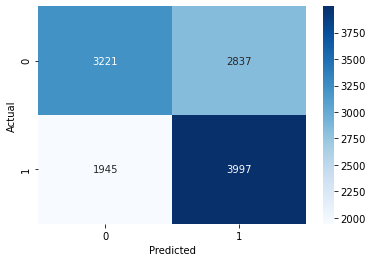

F1: 0.6257044458359424


Confusion matrix for ABC


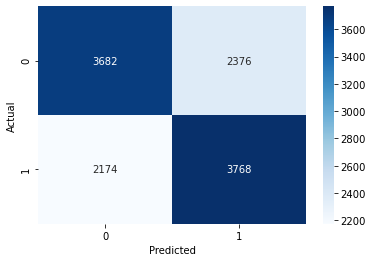

F1: 0.6235313585967236


Confusion matrix for XGBC


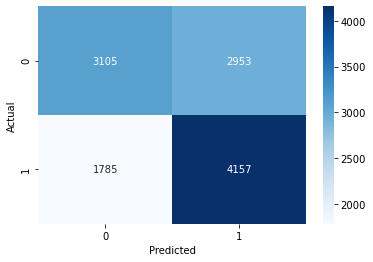

F1: 0.6369904995403004


In [24]:
import seaborn as sns
#initialize finalised models
RFC = RandomForestClassifier(max_features = "sqrt", max_depth = 8, \
                             criterion = "entropy", random_state = 42, \
                             n_jobs = -1)

BE = DecisionTreeClassifier(max_depth = 5, random_state = 42)
ABC = AdaBoostClassifier(algorithm='SAMME', base_estimator = BE, random_state=42)

XGBC = xgb.XGBClassifier(booster='dart', reg_alpha = 1, gamma = 0.5, \
                         reg_lambda = 0.125, learning_rate = 0.01, \
                         max_depth=5, random_state=42, n_jobs=-1, \
                         n_estimators = 125)

# train the models
RFC.fit(X_training, y_training)
ABC.fit(X_training, y_training)
XGBC.fit(X_training, y_training)

# predict the target variable for validation set
y_vali_RFC = RFC.predict(X_validation)
y_vali_ABC = ABC.predict(X_validation)
y_vali_XGBC = XGBC.predict(X_validation)

# calculate confusion matrix
conf_RFC = confusion_matrix(y_validation, y_vali_RFC)
conf_ABC = confusion_matrix(y_validation, y_vali_ABC)
conf_XGBC = confusion_matrix(y_validation, y_vali_XGBC)

# get the targets from target feature
unique_targets = np.unique(y_validation)

# plot the confusion matrices
print("Confusion matrix for RFC")
df_conf = pd.DataFrame(conf_RFC, columns=unique_targets, index = unique_targets)
df_conf.index.name = 'Actual'
df_conf.columns.name = 'Predicted'
sns.heatmap(df_conf, cmap="Blues", annot=True, fmt="d")
plt.show()
print("F1: {0}".format(f1_score(y_validation, y_vali_RFC)))

print("\n\nConfusion matrix for ABC")
df_conf = pd.DataFrame(conf_ABC, columns=unique_targets, index = unique_targets)
df_conf.index.name = 'Actual'
df_conf.columns.name = 'Predicted'
sns.heatmap(df_conf, cmap="Blues", annot=True, fmt="d")
plt.show()
print("F1: {0}".format(f1_score(y_validation, y_vali_ABC)))

print("\n\nConfusion matrix for XGBC")
df_conf = pd.DataFrame(conf_XGBC, columns=unique_targets, index = unique_targets)
df_conf.index.name = 'Actual'
df_conf.columns.name = 'Predicted'
sns.heatmap(df_conf, cmap="Blues", annot=True, fmt="d")
plt.show()
print("F1: {0}".format(f1_score(y_validation, y_vali_XGBC)))

Comparing the best model from all three algorithms against the validation set confirms that XGBoost is a better model to use among all, with an F1 score of 63.69%. The XGBoost classified the highest churn customers, which is the primary purpose of our project. So, the XGBoost will test against the test dataset, which was kept out from training the model.

## Model Evaluation

[18:44:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion matrix for XGBC on test


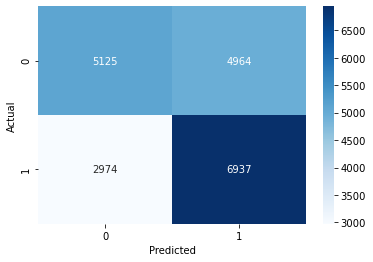

              precision    recall  f1-score   support

           0       0.63      0.51      0.56     10089
           1       0.58      0.70      0.64      9911

    accuracy                           0.60     20000
   macro avg       0.61      0.60      0.60     20000
weighted avg       0.61      0.60      0.60     20000



In [26]:
XGBC = xgb.XGBClassifier(booster='dart', reg_alpha = 1, gamma = 0.5, \
                         reg_lambda = 0.125, learning_rate = 0.01, \
                         max_depth=5, random_state=42, n_jobs=-1, \
                         n_estimators = 125)

XGBC.fit(X_train, y_train)

y_pred = XGBC.predict(X_test)

conf = confusion_matrix(y_test, y_pred)

print("Confusion matrix for XGBC on test")
df_conf = pd.DataFrame(conf, columns=unique_targets, index = unique_targets)
df_conf.index.name = 'Actual'
df_conf.columns.name = 'Predicted'
sns.heatmap(df_conf, cmap="Blues", annot=True, fmt="d")
plt.show()

print(classification_report(y_test, y_pred))

The evaluation of XGBoost against the test set (holdout set) resulted in around the same f1 score of around 60%. The model predicted 70% of churned customers from all the churned customers with an accuracy of 58%. The score is not significant; however, with the complexity of our dataset, 70% of recall is still a great score, and it would help the company earning more revenue. The project is just one cycle of the Data Science Life Cycle, and we can perform another cycle to improve the score by going through the steps again.